<a href="https://colab.research.google.com/github/YasidaWanigatunga/Leveraging-Text-Analytics-for-Stock-Market-Trading/blob/main/Group_Text_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# **Load the Dataset**

In [ ]:
file_path = '/content/drive/MyDrive/ML DL_Data_sets/apple news.xlsx'
data = pd.read_excel(file_path)

In [ ]:
data.head()

,updated_time,Stock price,NEWS,Tweets
0,2024-05-16,189.84,European regulators crack down on Big Tech,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,2024-05-16,189.84,Reuters World News: Trump's tactics and other ...,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,2024-05-16,189.84,TSMC says no damage to its Arizona facilities ...,My cat only chews @apple cords. Such an #Apple...
3,2024-05-16,189.84,"'What doesn't kill you makes you stronger,' Ch...",I agree with @jimcramer that the #IndividualIn...
4,2024-05-15,189.72,Wall Street boasts record closes as inflation ...,Nobody expects the Spanish Inquisition #AAPL


In [ ]:
print(data.columns)

Index(['updated_time', 'Stock price', 'NEWS', 'Tweets'], dtype='object')


# **Data Preprocessing**

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 updated_time    0
Stock price     0
NEWS            0
Tweets          0
dtype: int64


In [ ]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Function for text preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize
    return tokens

# Apply preprocessing to the 'NEWS' column
data['processed_text'] = data['NEWS'].apply(preprocess_text)

# Apply preprocessing to the 'Tweets' column
data['processed_tweets'] = data['Tweets'].apply(preprocess_text)

# Display the first few rows of the processed dataset
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,updated_time,Stock price,NEWS,Tweets,processed_text,processed_tweets
0,2024-05-16,189.84,European regulators crack down on Big Tech,#AAPL:The 10 best Steve Jobs emails ever...htt...,"[european, regulator, crack, big, tech]","[aaplthe, 10, best, steve, job, email, everhtt..."
1,2024-05-16,189.84,Reuters World News: Trump's tactics and other ...,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,"[reuters, world, news, trump, tactic, top, story]","[rt, jpdesloges, aapl, stock, miniflash, crash..."
2,2024-05-16,189.84,TSMC says no damage to its Arizona facilities ...,My cat only chews @apple cords. Such an #Apple...,"[tsmc, say, damage, arizona, facility, incident]","[cat, chew, apple, cord, applesnob]"
3,2024-05-16,189.84,"'What doesn't kill you makes you stronger,' Ch...",I agree with @jimcramer that the #IndividualIn...,"[doesnt, kill, make, stronger, china, troll, n...","[agree, jimcramer, individualinvestor, trade, ..."
4,2024-05-15,189.72,Wall Street boasts record closes as inflation ...,Nobody expects the Spanish Inquisition #AAPL,"[wall, street, boast, record, close, inflation...","[nobody, expects, spanish, inquisition, aapl]"


# **EDA**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print(data.info())

# Display summary statistics for numerical columns
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   updated_time      919 non-null    datetime64[ns]
 1   Stock price       919 non-null    float64       
 2   NEWS              919 non-null    object        
 3   Tweets            919 non-null    object        
 4   processed_text    919 non-null    object        
 5   processed_tweets  919 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 43.2+ KB
None
                        updated_time  Stock price
count                            919   919.000000
mean   2023-12-23 00:51:42.502720256   181.266202
min              2023-07-21 00:00:00   165.000000
25%              2023-10-03 00:00:00   173.660000
50%              2023-12-27 00:00:00   181.560000
75%              2024-03-08 00:00:00   188.850000
max              2024-05-16 00:00:00 

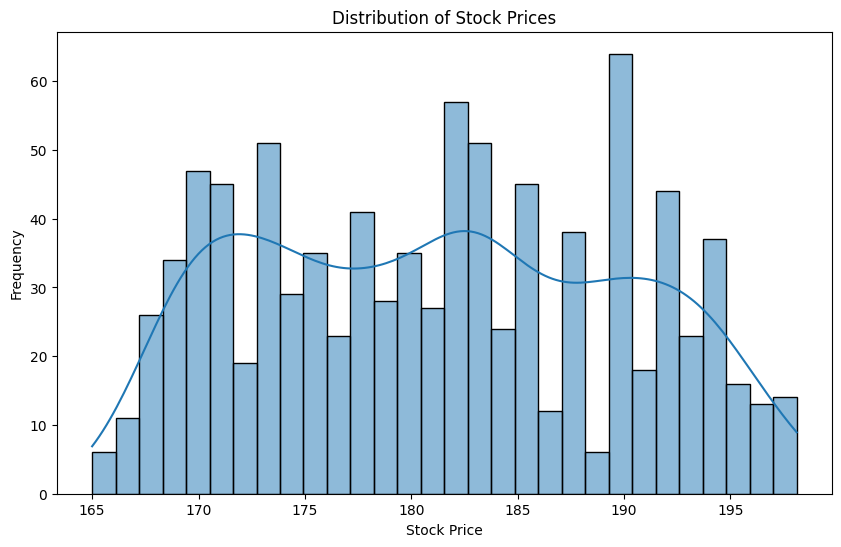

In [ ]:
# Histogram of stock prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Stock price'], bins=30, kde=True)
plt.title('Distribution of Stock Prices')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.show()

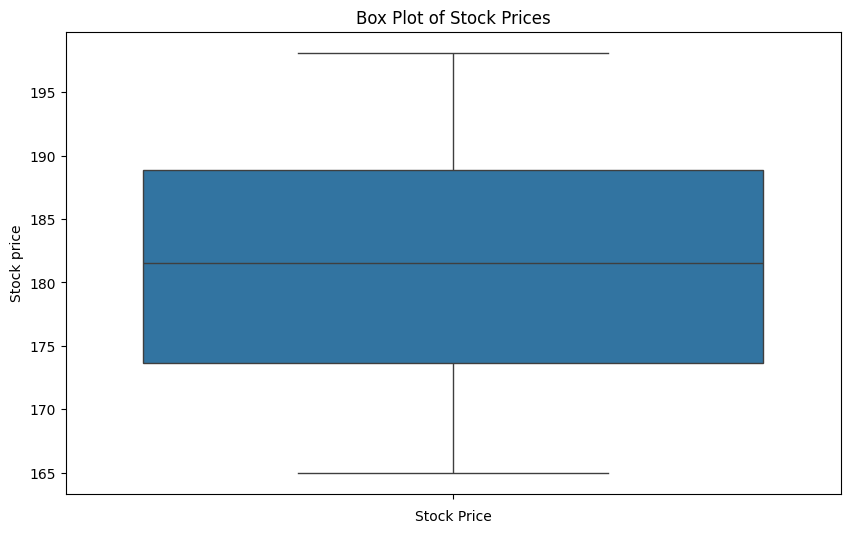

In [ ]:
# Box plot of stock prices
plt.figure(figsize=(10, 6))
sns.boxplot(data['Stock price'])
plt.title('Box Plot of Stock Prices')
plt.xlabel('Stock Price')
plt.show()

Summary Statistics from Box Plot:

*   Minimum Value: ~165 (lower whisker)



*   First Quartile (Q1): ~175 (bottom of the box)
*   Median (Q2): ~180 (line inside the box)

*   Third Quartile (Q3): ~190 (top of the box)
*   Maximum Value: ~195 (upper whisker)









# **Sentiment Analysis:**


In [ ]:
!pip install afinn vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.0 MB/s eta 0:00:00
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53430 sha256=2806e0d2da6fec443ccde29ed4aaf7da204169289337a2b93b58173501bcbb01
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [ ]:
import pandas as pd
import numpy as np
import re
from afinn import Afinn
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
# Initialize analyzers
afinn = Afinn()
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# Functions to get sentiment scores
def get_afinn_sentiment(text):
    return afinn.score(' '.join(text))

def get_vader_sentiment(text):
    sentiment = analyzer.polarity_scores(' '.join(text))
    return sentiment['compound']

In [ ]:
data['news_sentiment_afinn'] = data['processed_text'].apply(get_afinn_sentiment)
data['tweets_sentiment_afinn'] = data['processed_tweets'].apply(get_afinn_sentiment)
data['news_sentiment'] = data['processed_text'].apply(get_vader_sentiment)
data['tweets_sentiment'] = data['processed_tweets'].apply(get_vader_sentiment)

**Manual Labeling for Custom Model**

In [ ]:
# Sample labeling of the first 100 rows (replace with actual labels)
np.random.seed(42)
sample_labels = np.random.choice(['positive', 'negative', 'neutral'], size=100)

# Create a sentiment_label column and assign the sample labels to the first 100 rows
data['sentiment_label'] = np.nan
data.loc[:99, 'sentiment_label'] = sample_labels

In [ ]:
labeled_data = data.dropna(subset=['sentiment_label'])

# Convert text data to TF-IDF features
tfidf_vectorizer_news = TfidfVectorizer(max_features=5000)
tfidf_vectorizer_tweets = TfidfVectorizer(max_features=5000)

X_news = tfidf_vectorizer_news.fit_transform(labeled_data['NEWS'])
X_tweets = tfidf_vectorizer_tweets.fit_transform(labeled_data['Tweets'])
y = labeled_data['sentiment_label']

# Split the data into training and testing sets
X_train_news, X_test_news, y_train, y_test = train_test_split(X_news, y, test_size=0.2, random_state=42)
X_train_tweets, X_test_tweets, _, _ = train_test_split(X_tweets, y, test_size=0.2, random_state=42)

# Train the model on news data
model_news = LogisticRegression(max_iter=1000)
model_news.fit(X_train_news, y_train)

# Train the model on tweets data
model_tweets = LogisticRegression(max_iter=1000)
model_tweets.fit(X_train_tweets, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions on the test set
y_pred_news = model_news.predict(X_test_news)
y_pred_tweets = model_tweets.predict(X_test_tweets)

# Calculate performance metrics
accuracy_news = accuracy_score(y_test, y_pred_news)
precision_news = precision_score(y_test, y_pred_news, average='weighted')
recall_news = recall_score(y_test, y_pred_news, average='weighted')
f1_news = f1_score(y_test, y_pred_news, average='weighted')

accuracy_tweets = accuracy_score(y_test, y_pred_tweets)
precision_tweets = precision_score(y_test, y_pred_tweets, average='weighted')
recall_tweets = recall_score(y_test, y_pred_tweets, average='weighted')
f1_tweets = f1_score(y_test, y_pred_tweets, average='weighted')

print(f'News Sentiment Model - Accuracy: {accuracy_news}, Precision: {precision_news}, Recall: {recall_news}, F1-Score: {f1_news}')
print(f'Tweets Sentiment Model - Accuracy: {accuracy_tweets}, Precision: {precision_tweets}, Recall: {recall_tweets}, F1-Score: {f1_tweets}')

News Sentiment Model - Accuracy: 0.3, Precision: 0.2, Recall: 0.3, F1-Score: 0.2233766233766233
Tweets Sentiment Model - Accuracy: 0.35, Precision: 0.21000000000000002, Recall: 0.35, F1-Score: 0.2625


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Combine Sentiment Scores**

In [ ]:
labeled_indices = labeled_data.index

# Predict probabilities for the labeled data
labeled_data['news_prob'] = model_news.predict_proba(X_news)[:, 1]
labeled_data['tweets_prob'] = model_tweets.predict_proba(X_tweets)[:, 1]

# Initialize combined sentiment columns in the original data
data['combined_news_sentiment'] = np.nan
data['combined_tweets_sentiment'] = np.nan

# Combine sentiment scores for the labeled data
data.loc[labeled_indices, 'combined_news_sentiment'] = (labeled_data['news_sentiment_afinn'] + labeled_data['news_sentiment'] + labeled_data['news_prob']) / 3
data.loc[labeled_indices, 'combined_tweets_sentiment'] = (labeled_data['tweets_sentiment_afinn'] + labeled_data['tweets_sentiment'] + labeled_data['tweets_prob']) / 3

# Display the first few rows of the dataset with combined sentiment scores
print(data[['updated_time', 'Stock price', 'NEWS', 'Tweets', 'combined_news_sentiment', 'combined_tweets_sentiment']].head())

  updated_time  Stock price  \
0   2024-05-16       189.84   
1   2024-05-16       189.84   
2   2024-05-16       189.84   
3   2024-05-16       189.84   
4   2024-05-15       189.72   

                                                NEWS  \
0         European regulators crack down on Big Tech   
1  Reuters World News: Trump's tactics and other ...   
2  TSMC says no damage to its Arizona facilities ...   
3  'What doesn't kill you makes you stronger,' Ch...   
4  Wall Street boasts record closes as inflation ...   

                                              Tweets  combined_news_sentiment  \
0  #AAPL:The 10 best Steve Jobs emails ever...htt...                 0.409574   
1  RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...                 0.806781   
2  My cat only chews @apple cords. Such an #Apple...                -1.009241   
3  I agree with @jimcramer that the #IndividualIn...                -0.711837   
4       Nobody expects the Spanish Inquisition #AAPL                 0.

<ipython-input-18-6e3677959784>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_data['news_prob'] = model_news.predict_proba(X_news)[:, 1]
<ipython-input-18-6e3677959784>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_data['tweets_prob'] = model_tweets.predict_proba(X_tweets)[:, 1]


# **EDA on Combined Sentiment Scores and Stock Prices**

In [ ]:
# Summary statistics for sentiment scores
print(data[['news_sentiment', 'tweets_sentiment']].describe())

       news_sentiment  tweets_sentiment
count      919.000000        919.000000
mean         0.004313          0.029931
std          0.339213          0.386728
min         -0.880700         -0.928600
25%         -0.128000         -0.153100
50%          0.000000          0.000000
75%          0.202300          0.318200
max          0.880700          0.924600


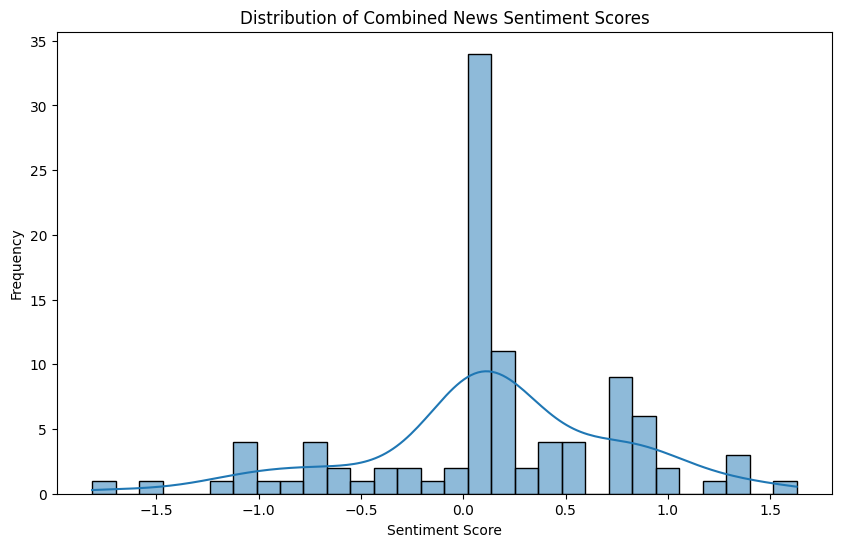

In [ ]:
# Histogram of combined news sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(data['combined_news_sentiment'], bins=30, kde=True)
plt.title('Distribution of Combined News Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

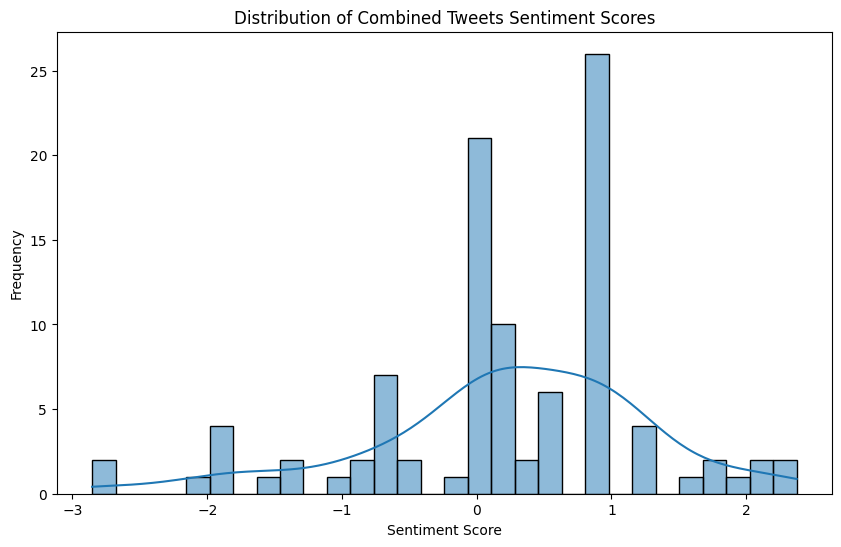

In [ ]:
# Histogram of combined tweets sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(data['combined_tweets_sentiment'], bins=30, kde=True)
plt.title('Distribution of Combined Tweets Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

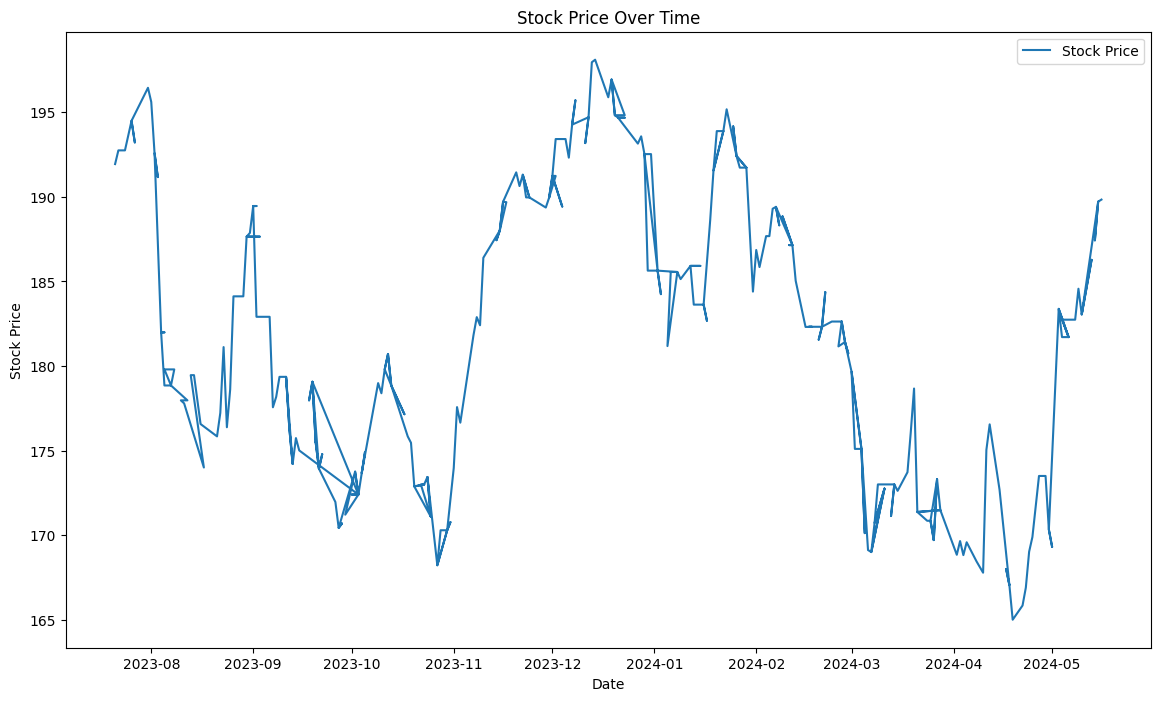

In [ ]:
# Time series plot of stock prices
plt.figure(figsize=(14, 8))
plt.plot(data['updated_time'], data['Stock price'], label='Stock Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

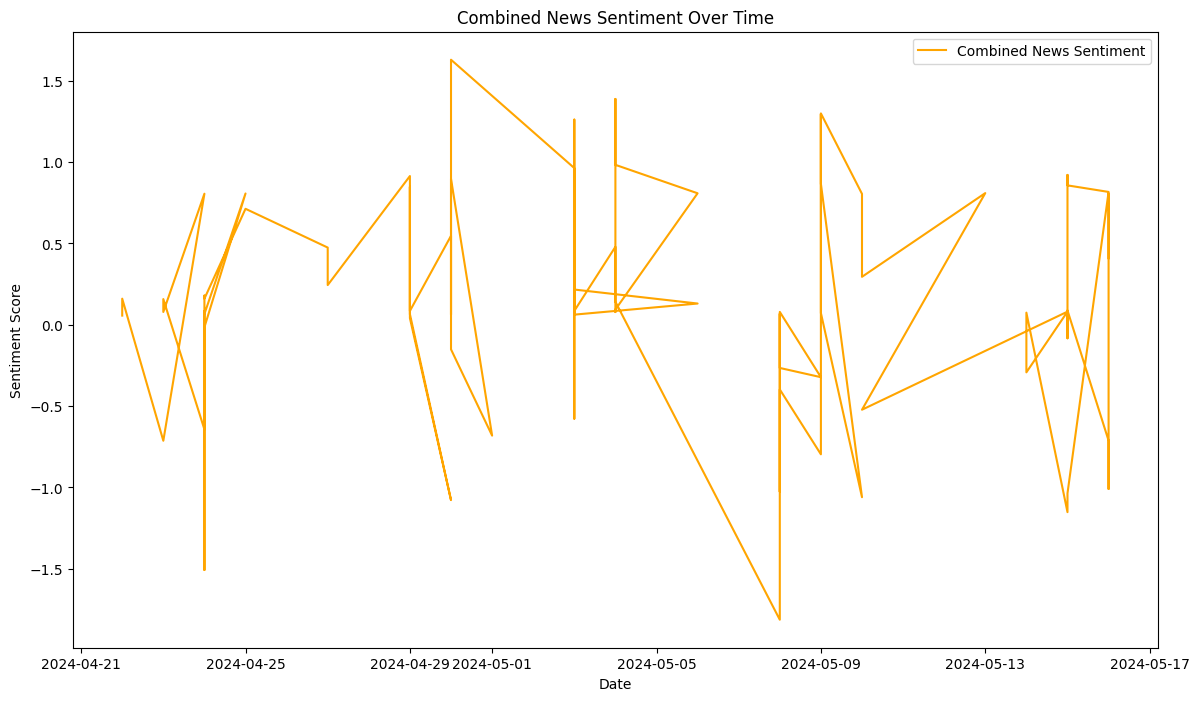

In [ ]:
# Time series plot of combined news sentiment scores
plt.figure(figsize=(14, 8))
plt.plot(data['updated_time'], data['combined_news_sentiment'], label='Combined News Sentiment', color='orange')
plt.title('Combined News Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()

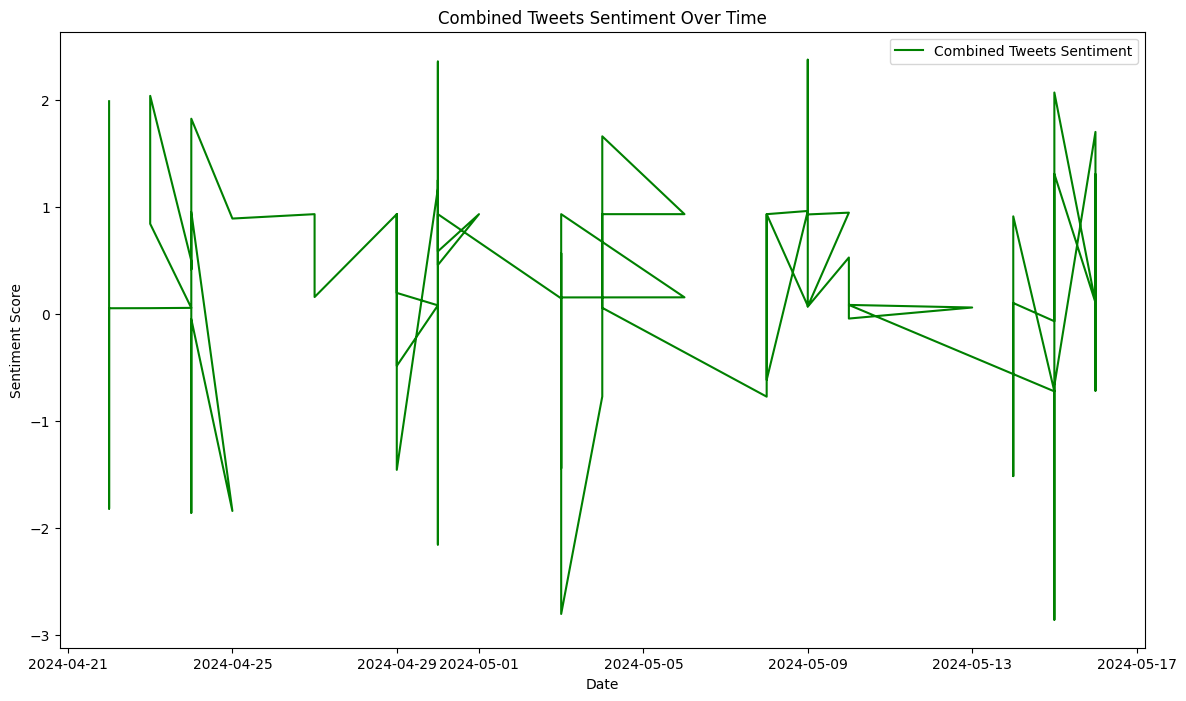

In [ ]:
# Time series plot of combined tweets sentiment scores
plt.figure(figsize=(14, 8))
plt.plot(data['updated_time'], data['combined_tweets_sentiment'], label='Combined Tweets Sentiment', color='green')
plt.title('Combined Tweets Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()

# **Model Building and Selection**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from math import sqrt
import seaborn as sns

In [ ]:
data = data.sort_values(by='updated_time')

In [ ]:
features = data[['combined_news_sentiment', 'combined_tweets_sentiment']]
target = data['Stock price']

In [ ]:
# Check the features and target data before any transformations
print("Features DataFrame before any transformation:")
print(features.head())
print("Features DataFrame shape:", features.shape)

print("Target DataFrame before any transformation:")
print(target.head())
print("Target DataFrame shape:", target.shape)

Features DataFrame before any transformation:
     combined_news_sentiment  combined_tweets_sentiment
918                      NaN                        NaN
917                      NaN                        NaN
916                      NaN                        NaN
913                      NaN                        NaN
915                      NaN                        NaN
Features DataFrame shape: (919, 2)
Target DataFrame before any transformation:
918    191.94
917    192.75
916    192.75
913    192.75
915    193.62
Name: Stock price, dtype: float64
Target DataFrame shape: (919,)


In [ ]:
# Split the data
split_index = int(0.8 * len(data))
X_train, X_test = features[:split_index], features[split_index:]
y_train, y_test = target[:split_index], target[split_index:]

print("X_train shape before any transformations:", X_train.shape)
print("X_test shape before any transformations:", X_test.shape)

X_train shape before any transformations: (735, 2)
X_test shape before any transformations: (184, 2)


In [ ]:
# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape after scaling:", X_train.shape)
print("X_test shape after scaling:", X_test.shape)

X_train shape after scaling: (735, 2)
X_test shape after scaling: (184, 2)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
print("X_train shape after imputation:", X_train.shape)
print("X_test shape after imputation:", X_test.shape)

X_train shape after imputation: (735, 0)
X_test shape after imputation: (184, 0)


In [ ]:
# Check if any columns have been dropped
print("X_train after imputation:", X_train)
print("X_test after imputation:", X_test)

X_train after imputation: []
X_test after imputation: []


**Linear Regression**

In [ ]:
# Check for NaN values in the features
print("Checking for NaN values in features:")
print(features.isna().sum())

Checking for NaN values in features:
combined_news_sentiment      819
combined_tweets_sentiment    819
dtype: int64


In [ ]:
# Drop rows with NaN values in the features
features = features.dropna()
target = target[features.index]

In [ ]:
# Check again after dropping NaN values
print("Features DataFrame after dropping NaN values:")
print(features.head())
print("Features DataFrame shape:", features.shape)

print("Target DataFrame after dropping NaN values:")
print(target.head())
print("Target DataFrame shape:", target.shape)

# Split the data
split_index = int(0.8 * len(features))
X_train, X_test = features[:split_index], features[split_index:]
y_train, y_test = target[:split_index], target[split_index:]

print("X_train shape before any transformations:", X_train.shape)
print("X_test shape before any transformations:", X_test.shape)

# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train shape after scaling:", X_train.shape)
print("X_test shape after scaling:", X_test.shape)

# Impute missing values if needed (though we've already dropped NaNs)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

print("X_train shape after imputation:", X_train.shape)
print("X_test shape after imputation:", X_test.shape)

# Check if any columns have been dropped
print("X_train after imputation:", X_train)
print("X_test after imputation:", X_test)

# Now fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("Linear Regression MSE:", lr_mse)
print("Linear Regression R^2:", lr_r2)

Features DataFrame after dropping NaN values:
    combined_news_sentiment  combined_tweets_sentiment
97                 0.160572                   0.053851
99                 0.056486                   1.986797
98                 0.073288                  -1.817072
96                -0.712961                   0.054672
94                 0.078832                   0.842032
Features DataFrame shape: (100, 2)
Target DataFrame after dropping NaN values:
97    165.84
99    165.84
98    165.84
96    166.90
94    166.90
Name: Stock price, dtype: float64
Target DataFrame shape: (100,)
X_train shape before any transformations: (80, 2)
X_test shape before any transformations: (20, 2)
X_train shape after scaling: (80, 2)
X_test shape after scaling: (20, 2)
X_train shape after imputation: (80, 2)
X_test shape after imputation: (20, 2)
X_train after imputation: [[-0.01236709 -0.23077774]
 [-0.17804411  1.73471665]
 [-0.15130065 -2.13320549]
 [-1.40279594 -0.22994283]
 [-0.14247543  0.57067566]
 [-

In [ ]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Regressor MSE:", rf_mse)
print("Random Forest Regressor R^2:", rf_r2)

Random Forest Regressor MSE: 161.5244089880013
Random Forest Regressor R^2: -184.82342308418217


In [ ]:
# Support Vector Regression
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

print("Support Vector Regression MSE:", rf_mse)
print("Support Vector Regression R^2:", rf_r2)

Support Vector Regression MSE: 161.5244089880013
Support Vector Regression R^2: -184.82342308418217


# Hyperparameter Tuning for SVR:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [ ]:
# Define the parameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

In [ ]:
# Instantiate the SVR model
svr = SVR()

In [ ]:
# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='neg_mean_squared_error')

In [ ]:
# Get the best parameters and the best model
best_params = grid_search.best_params_
best_svr_model = grid_search.best_estimator_

In [ ]:
# Evaluate the best model
best_svr_predictions = best_svr_model.predict(X_test)
best_svr_mse = mean_squared_error(y_test, best_svr_predictions)
best_svr_r2 = r2_score(y_test, best_svr_predictions)

print("Best SVR parameters:", best_params)
print("Best SVR MSE:", best_svr_mse)
print("Best SVR R^2:", best_svr_r2)

Best SVR parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
Best SVR MSE: 136.83754558329517
Best SVR R^2: -156.4227776844216


# Building an LSTM Model

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.optimizers import Adam

In [ ]:
# Prepare the data
def prepare_data(data, feature_columns, target_column, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[feature_columns].iloc[i:(i + time_steps)].values)
        y.append(data[target_column].iloc[i + time_steps])
    return np.array(X), np.array(y)

In [ ]:
# Check for NaN values and handle them
features = data[['combined_news_sentiment', 'combined_tweets_sentiment']].copy()
target = data['Stock price'].copy()

In [ ]:
# Fill NaN values in features and target
features.fillna(features.mean(), inplace=True)
target.fillna(target.mean(), inplace=True)

In [ ]:
# Ensure all values are finite
assert np.isfinite(features).all().all()
assert np.isfinite(target).all()

In [ ]:
# Initialize the scaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

In [ ]:
# Scale the features and target
X_scaled = scaler_X.fit_transform(features)
y_scaled = scaler_y.fit_transform(target.values.reshape(-1, 1))

# Reshape input to be 3D [samples, timesteps, features]
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

In [ ]:
# Split data into training and testing sets
split = int(0.8 * len(X_scaled))
X_train, X_test = X_scaled[:split], X_scaled[split:]
y_train, y_test = y_scaled[:split], y_scaled[split:]


In [ ]:
# Ensure no NaN values in the training and testing sets
assert not np.isnan(X_train).any()
assert not np.isnan(X_test).any()
assert not np.isnan(y_train).any()
assert not np.isnan(y_test).any()

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [ ]:
# Fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
23/23 [==============================] - 2s 18ms/step - loss: 0.3359 - val_loss: 0.1142
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 0.2555 - val_loss: 0.0807
Epoch 3/200
23/23 [==============================] - 0s 4ms/step - loss: 0.1879 - val_loss: 0.0605
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 0.1316 - val_loss: 0.0560
Epoch 5/200
23/23 [==============================] - 0s 4ms/step - loss: 0.0908 - val_loss: 0.0684
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: 0.0683 - val_loss: 0.0907
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 0.0608 - val_loss: 0.1084
Epoch 8/200
23/23 [==============================] - 0s 4ms/step - loss: 0.0594 - val_loss: 0.1143
Epoch 9/200
23/23 [==============================] - 0s 4ms/step - loss: 0.0593 - val_loss: 0.1153
Epoch 10/200
23/23 [==============================] - 0s 4ms/step - loss: 0.0594 - val_loss: 0.1169
Epoch 11

In [ ]:
# Make predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

6/6 [==============================] - 1s 4ms/step


In [ ]:
# Evaluate the model
lstm_mse = mean_squared_error(scaler_y.inverse_transform(y_test), y_pred)
lstm_r2 = r2_score(scaler_y.inverse_transform(y_test), y_pred)

print("LSTM MSE:", lstm_mse)
print("LSTM R^2:", lstm_r2)

LSTM MSE: 123.80090512839247
LSTM R^2: -1.094369118506199


In [ ]:
# RMSE
lr_rmse = sqrt(lr_mse)
rf_rmse = sqrt(rf_mse)
svr_rmse = sqrt(best_svr_mse)
lstm_rmse = sqrt(lstm_mse)

In [ ]:
performance = {
    'Model': ['Linear Regression', 'Random Forest', 'SVR', 'LSTM'],
    'RMSE': [lr_rmse, rf_rmse, svr_rmse, lstm_rmse],
    'R^2': [lr_r2, rf_r2, svr_r2, lstm_r2]
}
performance_df = pd.DataFrame(performance)
print(performance_df)

               Model       RMSE         R^2
0  Linear Regression  12.793476 -187.295276
1      Random Forest  12.709225 -184.823423
2                SVR  11.697758 -167.429374
3               LSTM  11.126586   -1.094369


In [ ]:
# Select the best model
best_model_name = performance_df.loc[performance_df['R^2'].idxmax(), 'Model']
print(f'The best model is: {best_model_name}')

The best model is: LSTM


In [ ]:
# Plot Performance Comparison
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0.5, 0, 'Model')

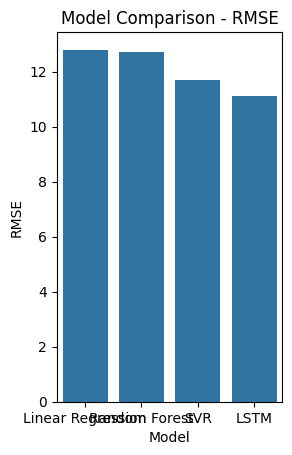

In [ ]:
# Plot RMSE
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='RMSE', data=performance_df)
plt.title('Model Comparison - RMSE')
plt.ylabel('RMSE')
plt.xlabel('Model')

Text(0.5, 0, 'Model')

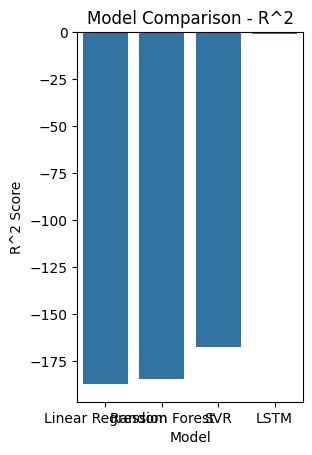

In [ ]:
# Plot R^2
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='R^2', data=performance_df)
plt.title('Model Comparison - R^2')
plt.ylabel('R^2 Score')
plt.xlabel('Model')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# **Evaluation**

# **1. Assessing Potential Gains and Variability of Profitability**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
def calculate_metrics(actual_prices, predicted_prices):
    mse = mean_squared_error(actual_prices, predicted_prices)
    mae = mean_absolute_error(actual_prices, predicted_prices)
    r2 = r2_score(actual_prices, predicted_prices)
    return mse, mae, r2

In [ ]:
# Parameters
initial_capital = 10000

# Actual prices (assumed to be already defined)
actual_prices = scaler_y.inverse_transform(y_test).squeeze()

In [ ]:
# Trim actual_prices to match the length of the predictions
def trim_to_match(actual, predicted):
    min_length = min(len(actual), len(predicted))
    return actual[:min_length], predicted[:min_length]

In [ ]:
# Linear Regression
X_test_2d = X_test.reshape(X_test.shape[0], -1)
lr_predictions = lr_model.predict(X_test_2d)
lr_pred_prices = scaler_y.inverse_transform(lr_predictions.reshape(-1, 1)).squeeze()
actual_trimmed, lr_pred_prices = trim_to_match(actual_prices, lr_pred_prices)
lr_capital_over_time, lr_total_profit_loss = calculate_trading_profits(initial_capital, actual_trimmed, lr_pred_prices)
lr_mse, lr_mae, lr_r2 = calculate_metrics(actual_trimmed, lr_pred_prices)
print(f"Linear Regression - MSE: {lr_mse:.2f}, MAE: {lr_mae:.2f}, R²: {lr_r2:.2f}")

Linear Regression - MSE: 34185382.56, MAE: 5846.82, R²: -578321.18


In [ ]:
# Random Forest
rf_predictions = rf_model.predict(X_test_2d)
rf_pred_prices = scaler_y.inverse_transform(rf_predictions.reshape(-1, 1)).squeeze()
actual_trimmed, rf_pred_prices = trim_to_match(actual_prices, rf_pred_prices)
rf_capital_over_time, rf_total_profit_loss = calculate_trading_profits(initial_capital, actual_trimmed, rf_pred_prices)
rf_mse, rf_mae, rf_r2 = calculate_metrics(actual_trimmed, rf_pred_prices)
print(f"Random Forest - MSE: {rf_mse:.2f}, MAE: {rf_mae:.2f}, R²: {rf_r2:.2f}")

Random Forest - MSE: 34504834.53, MAE: 5873.83, R²: -583725.43


In [ ]:
# SVR
svr_predictions = best_svr_model.predict(X_test_2d)
svr_pred_prices = scaler_y.inverse_transform(svr_predictions.reshape(-1, 1)).squeeze()
actual_trimmed, svr_pred_prices = trim_to_match(actual_prices, svr_pred_prices)
svr_capital_over_time, svr_total_profit_loss = calculate_trading_profits(initial_capital, actual_trimmed, svr_pred_prices)
svr_mse, svr_mae, svr_r2 = calculate_metrics(actual_trimmed, svr_pred_prices)
print(f"SVR - MSE: {svr_mse:.2f}, MAE: {svr_mae:.2f}, R²: {svr_r2:.2f}")

SVR - MSE: 34486694.48, MAE: 5872.53, R²: -583418.55


In [ ]:
# LSTM
lstm_predictions = model.predict(X_test)
lstm_predictions_2d = lstm_predictions.reshape(-1, 1)
lstm_pred_prices = scaler_y.inverse_transform(lstm_predictions_2d).squeeze()
actual_trimmed, lstm_pred_prices = trim_to_match(actual_prices, lstm_pred_prices)
lstm_capital_over_time, lstm_total_profit_loss = calculate_trading_profits(initial_capital, actual_trimmed, lstm_pred_prices)
lstm_mse, lstm_mae, lstm_r2 = calculate_metrics(actual_trimmed, lstm_pred_prices)
print(f"LSTM - MSE: {lstm_mse:.2f}, MAE: {lstm_mae:.2f}, R²: {lstm_r2:.2f}")

6/6 [==============================] - 0s 7ms/step
LSTM - MSE: 160.34, MAE: 10.06, R²: -1.71


In [ ]:
# Compare the Models
metrics_summary = {
    'Model': ['Linear Regression', 'Random Forest', 'SVR', 'LSTM'],
    'MSE': [lr_mse, rf_mse, svr_mse, lstm_mse],
    'MAE': [lr_mae, rf_mae, svr_mae, lstm_mae],
    'R²': [lr_r2, rf_r2, svr_r2, lstm_r2]
}

metrics_df = pd.DataFrame(metrics_summary)
print(metrics_df)

               Model           MSE          MAE             R²
0  Linear Regression  3.418538e+07  5846.821226 -578321.181608
1      Random Forest  3.450483e+07  5873.832005 -583725.425869
2                SVR  3.448669e+07  5872.532217 -583418.546425
3               LSTM  1.603391e+02    10.063344      -1.712495


In [ ]:
# Identify the best model based on the lowest MSE
best_model = metrics_df.loc[metrics_df['MSE'].idxmin()]
print(f"The best model is: {best_model['Model']} with MSE: {best_model['MSE']:.2f}, MAE: {best_model['MAE']:.2f}, R²: {best_model['R²']:.2f}")

The best model is: LSTM with MSE: 160.34, MAE: 10.06, R²: -1.71


**1. Define the Profitability Calculation Function**

In [ ]:
def calculate_profitability(actual_prices, predicted_prices):
    # Ensure actual_prices and predicted_prices are numpy arrays
    actual_prices = np.array(actual_prices)
    predicted_prices = np.array(predicted_prices)

    # Calculate price changes
    actual_changes = np.diff(actual_prices)
    predicted_changes = np.diff(predicted_prices)

    # Ensure the arrays have the same length
    min_length = min(len(actual_changes), len(predicted_changes))
    actual_changes = actual_changes[:min_length]
    predicted_changes = predicted_changes[:min_length]

    # Calculate profits based on matching signs of price changes
    profits = np.where(np.sign(predicted_changes) == np.sign(actual_changes), actual_changes, -actual_changes)

    return profits

**2. Calculate Hypothetical Trading Profits or Losses for Each Model**

**For Linear Regression**

In [ ]:
# Linear Regression
X_test_2d = X_test.reshape(X_test.shape[0], -1)
lr_predictions = lr_model.predict(X_test_2d)
lr_pred_prices = scaler_y.inverse_transform(lr_predictions.reshape(-1, 1)).squeeze()

# Calculate profitability
lr_profits = calculate_profitability(actual_prices, lr_pred_prices)

# Simulate trading with initial capital
initial_capital = 10000  # Starting with $10,000
lr_capital = initial_capital
lr_capital_over_time = [lr_capital]

for profit in lr_profits:
    lr_capital += profit
    lr_capital_over_time.append(lr_capital)

# Convert the list to a numpy array
lr_capital_over_time = np.array(lr_capital_over_time)

# Calculate final returns and total profit/loss
lr_final_return = (lr_capital - initial_capital) / initial_capital
lr_total_profit_loss = lr_capital - initial_capital

print(f"Linear Regression Final Return: {lr_final_return * 100:.2f}%")
print(f"Linear Regression Total Profit/Loss: ${lr_total_profit_loss:.2f}")

Linear Regression Final Return: 0.25%
Linear Regression Total Profit/Loss: $25.13


**For Random Forest**

In [ ]:
# Random Forest
rf_predictions = rf_model.predict(X_test_2d)
rf_pred_prices = scaler_y.inverse_transform(rf_predictions.reshape(-1, 1)).squeeze()

# Calculate profitability
rf_profits = calculate_profitability(actual_prices, rf_pred_prices)

# Simulate trading with initial capital
rf_capital = initial_capital
rf_capital_over_time = [rf_capital]

for profit in rf_profits:
    rf_capital += profit
    rf_capital_over_time.append(rf_capital)

# Convert the list to a numpy array
rf_capital_over_time = np.array(rf_capital_over_time)

# Calculate final returns and total profit/loss
rf_final_return = (rf_capital - initial_capital) / initial_capital
rf_total_profit_loss = rf_capital - initial_capital

print(f"Random Forest Final Return: {rf_final_return * 100:.2f}%")
print(f"Random Forest Total Profit/Loss: ${rf_total_profit_loss:.2f}")

Random Forest Final Return: -0.03%
Random Forest Total Profit/Loss: $-3.29


**For SVR**

In [ ]:
# SVR
svr_predictions = best_svr_model.predict(X_test_2d)
svr_pred_prices = scaler_y.inverse_transform(svr_predictions.reshape(-1, 1)).squeeze()

# Calculate profitability
svr_profits = calculate_profitability(actual_prices, svr_pred_prices)

# Simulate trading with initial capital
svr_capital = initial_capital
svr_capital_over_time = [svr_capital]

for profit in svr_profits:
    svr_capital += profit
    svr_capital_over_time.append(svr_capital)

# Convert the list to a numpy array
svr_capital_over_time = np.array(svr_capital_over_time)

# Calculate final returns and total profit/loss
svr_final_return = (svr_capital - initial_capital) / initial_capital
svr_total_profit_loss = svr_capital - initial_capital

print(f"SVR Final Return: {svr_final_return * 100:.2f}%")
print(f"SVR Total Profit/Loss: ${svr_total_profit_loss:.2f}")

SVR Final Return: 0.25%
SVR Total Profit/Loss: $25.13


**For LSTM**

In [ ]:
# LSTM
lstm_predictions = model.predict(X_test)

# Ensure lstm_predictions is 2D before applying the inverse transform
lstm_predictions_2d = lstm_predictions.reshape(-1, 1)
lstm_pred_prices = scaler_y.inverse_transform(lstm_predictions_2d).squeeze()

# Calculate profitability
lstm_profits = calculate_profitability(actual_prices, lstm_pred_prices)

# Simulate trading with initial capital
initial_capital = 10000  # Starting with $10,000
lstm_capital = initial_capital
lstm_capital_over_time = [lstm_capital]

for profit in lstm_profits:
    lstm_capital += profit
    lstm_capital_over_time.append(lstm_capital)

# Convert the list to a numpy array
lstm_capital_over_time = np.array(lstm_capital_over_time)

# Calculate final returns and total profit/loss
lstm_final_return = (lstm_capital - initial_capital) / initial_capital
lstm_total_profit_loss = lstm_capital - initial_capital

print(f"LSTM Final Return: {lstm_final_return * 100:.2f}%")
print(f"LSTM Total Profit/Loss: ${lstm_total_profit_loss:.2f}")

6/6 [==============================] - 0s 4ms/step
LSTM Final Return: 0.24%
LSTM Total Profit/Loss: $23.73


**Compare the Models**

               Model  Final Return (%)  Total Profit/Loss ($)
0  Linear Regression            0.2513                  25.13
1      Random Forest           -0.0329                  -3.29
2                SVR            0.2513                  25.13
3               LSTM            0.2373                  23.73


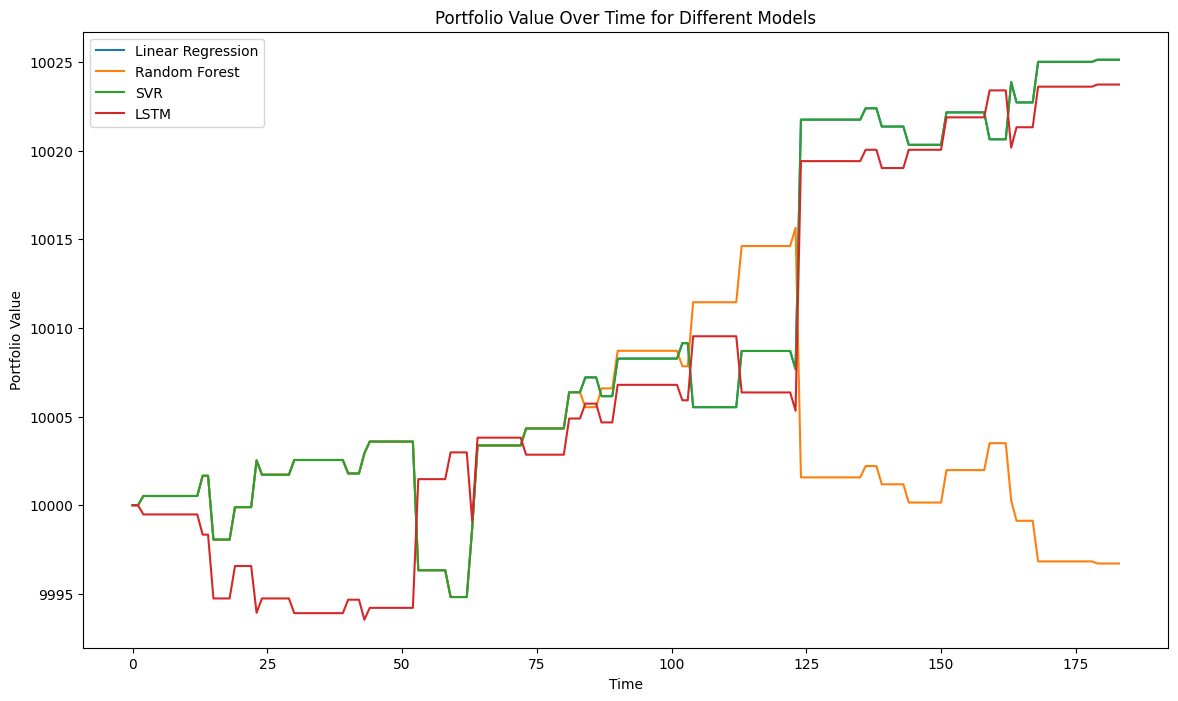

In [ ]:
# Performance summary
performance_summary = {
    'Model': ['Linear Regression', 'Random Forest', 'SVR', 'LSTM'],
    'Final Return (%)': [lr_final_return * 100, rf_final_return * 100, svr_final_return * 100, lstm_final_return * 100],
    'Total Profit/Loss ($)': [lr_total_profit_loss, rf_total_profit_loss, svr_total_profit_loss, lstm_total_profit_loss]
}

performance_df = pd.DataFrame(performance_summary)
print(performance_df)

# Plot Portfolio Values Over Time for Each Model
plt.figure(figsize=(14, 8))
plt.plot(lr_capital_over_time, label='Linear Regression')
plt.plot(rf_capital_over_time, label='Random Forest')
plt.plot(svr_capital_over_time, label='SVR')
plt.plot(lstm_capital_over_time, label='LSTM')
plt.title('Portfolio Value Over Time for Different Models')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

# **2. Calculating Hypothetical Trading Profits or Losses Based on Predicted Price Movements**

In [ ]:
def calculate_trading_profits(initial_capital, actual_prices, predicted_prices):
    capital = initial_capital
    position = 0  # 0 means no position, 1 means holding stock, -1 means shorting stock
    capital_over_time = [capital]

    for actual_price, predicted_price in zip(actual_prices[:-1], predicted_prices[1:]):
        if predicted_price > actual_price:  # Prediction of price increase
            if position <= 0:  # Only buy if not holding or shorting
                position = 1
                capital -= actual_price  # Buy stock
        elif predicted_price < actual_price:  # Prediction of price decrease
            if position >= 0:  # Only sell if holding or not shorting
                position = -1
                capital += actual_price  # Sell stock

        # Update capital based on the current position
        capital_over_time.append(capital + (position * actual_price))

    # Close any open positions at the end
    if position == 1:
        capital += actual_prices[-1]  # Sell at the last price
    elif position == -1:
        capital -= actual_prices[-1]  # Buy at the last price

    capital_over_time.append(capital)

    return np.array(capital_over_time), capital - initial_capital

# Parameters
initial_capital = 10000

In [ ]:
# Linear Regression
lr_predictions = lr_model.predict(X_test_2d)
lr_pred_prices = scaler_y.inverse_transform(lr_predictions.reshape(-1, 1)).squeeze()

# Random Forest
rf_predictions = rf_model.predict(X_test_2d)
rf_pred_prices = scaler_y.inverse_transform(rf_predictions.reshape(-1, 1)).squeeze()

# SVR
svr_predictions = best_svr_model.predict(X_test_2d)
svr_pred_prices = scaler_y.inverse_transform(svr_predictions.reshape(-1, 1)).squeeze()

# LSTM
lstm_predictions = model.predict(X_test)
lstm_predictions_2d = lstm_predictions.reshape(-1, 1)
lstm_pred_prices = scaler_y.inverse_transform(lstm_predictions_2d).squeeze()

print("Linear Regression Predictions: ", lr_pred_prices[:10])
print("Random Forest Predictions: ", rf_pred_prices[:10])
print("SVR Predictions: ", svr_pred_prices[:10])
print("LSTM Predictions: ", lstm_pred_prices[:10])

6/6 [==============================] - 0s 3ms/step
Linear Regression Predictions:  [6021.78318264 6021.78318264 6021.78318264 6021.78318264 6021.78318264
 6021.78318264 6021.78318264 6021.78318264 6021.78318264 6021.78318264]
Random Forest Predictions:  [6079.727357 6079.727357 6079.727357 6079.727357 6079.727357 6079.727357
 6079.727357 6079.727357 6079.727357 6079.727357]
SVR Predictions:  [6047.46981813 6047.46981813 6047.46981813 6047.46981813 6047.46981813
 6047.46981813 6047.46981813 6047.46981813 6047.46981813 6047.46981813]
LSTM Predictions:  [164.73994 166.3006  164.29028 164.55371 164.82047 164.95418 164.62437
 165.48746 165.20088 165.29123]


**Calculate trading profits for each model**

In [ ]:
#Linear Regression
lr_capital_over_time, lr_total_profit_loss = calculate_trading_profits(initial_capital, actual_prices, lr_pred_prices)
print(f"Linear Regression Total Profit/Loss: ${lr_total_profit_loss:.2f}")

Linear Regression Total Profit/Loss: $18.47


In [ ]:
# Random Forest
rf_capital_over_time, rf_total_profit_loss = calculate_trading_profits(initial_capital, actual_prices, rf_pred_prices)
print(f"Random Forest Total Profit/Loss: ${rf_total_profit_loss:.2f}")

Random Forest Total Profit/Loss: $18.47


In [ ]:
# SVR
svr_capital_over_time, svr_total_profit_loss = calculate_trading_profits(initial_capital, actual_prices, svr_pred_prices)
print(f"SVR Total Profit/Loss: ${svr_total_profit_loss:.2f}")

SVR Total Profit/Loss: $18.47


In [ ]:
# LSTM
lstm_capital_over_time, lstm_total_profit_loss = calculate_trading_profits(initial_capital, actual_prices, lstm_pred_prices)
print(f"LSTM Total Profit/Loss: ${lstm_total_profit_loss:.2f}")

LSTM Total Profit/Loss: $-17.63


               Model  Total Profit/Loss ($)
0  Linear Regression                  18.47
1      Random Forest                  18.47
2                SVR                  18.47
3               LSTM                 -17.63


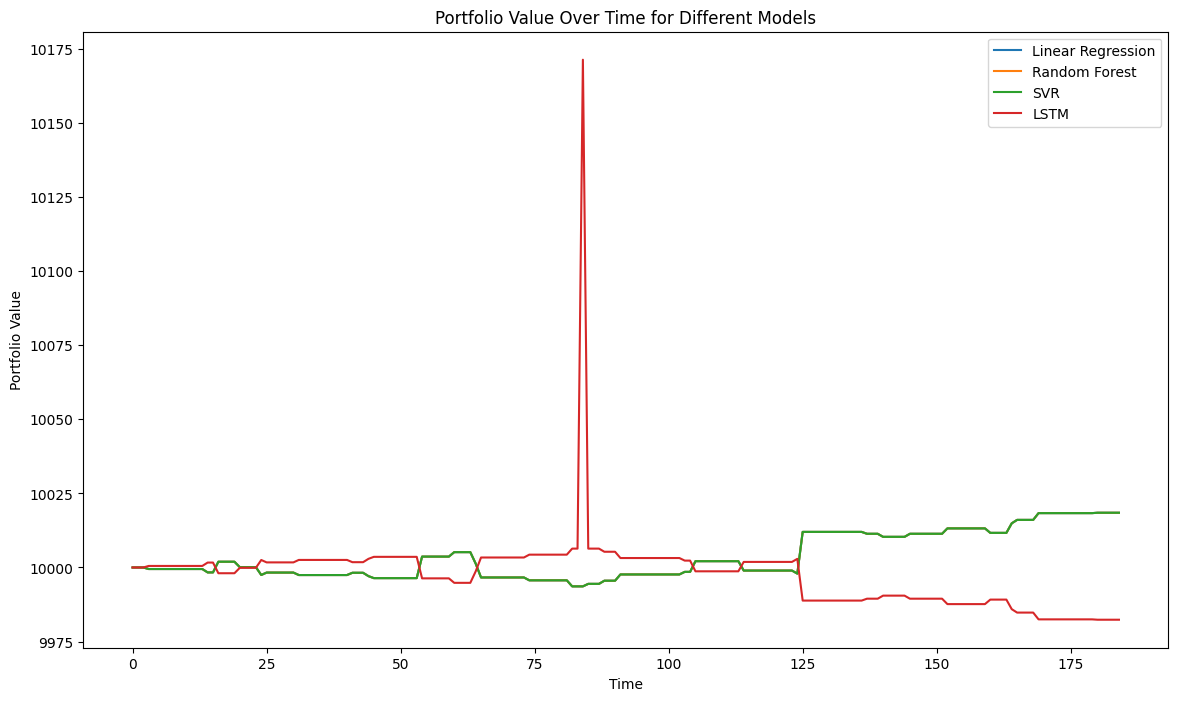

In [ ]:
# Compare the Models
performance_summary = {
    'Model': ['Linear Regression', 'Random Forest', 'SVR', 'LSTM'],
    'Total Profit/Loss ($)': [lr_total_profit_loss, rf_total_profit_loss, svr_total_profit_loss, lstm_total_profit_loss]
}

performance_df = pd.DataFrame(performance_summary)
print(performance_df)

# Plot Portfolio Values Over Time for Each Model
plt.figure(figsize=(14, 8))
plt.plot(lr_capital_over_time, label='Linear Regression')
plt.plot(rf_capital_over_time, label='Random Forest')
plt.plot(svr_capital_over_time, label='SVR')
plt.plot(lstm_capital_over_time, label='LSTM')
plt.title('Portfolio Value Over Time for Different Models')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

# **Analyze the Variability of Profitability to Understand the Robustness of the Model**

In [ ]:
def calculate_variability_metrics(capital_over_time):
    # Calculate daily returns
    returns = np.diff(capital_over_time) / capital_over_time[:-1]

    # Standard Deviation of returns
    std_dev = np.std(returns)

    # Sharpe Ratio (assuming risk-free rate is 0 for simplicity)
    sharpe_ratio = np.mean(returns) / std_dev * np.sqrt(252)  # Annualize the Sharpe ratio

    # Maximum Drawdown
    cumulative_returns = capital_over_time / capital_over_time[0]
    max_drawdown = np.max(np.maximum.accumulate(cumulative_returns) - cumulative_returns)

    return std_dev, sharpe_ratio, max_drawdown

In [ ]:
# Calculate variability metrics for each model
lr_std_dev, lr_sharpe_ratio, lr_max_drawdown = calculate_variability_metrics(lr_capital_over_time)
rf_std_dev, rf_sharpe_ratio, rf_max_drawdown = calculate_variability_metrics(rf_capital_over_time)
svr_std_dev, svr_sharpe_ratio, svr_max_drawdown = calculate_variability_metrics(svr_capital_over_time)
lstm_std_dev, lstm_sharpe_ratio, lstm_max_drawdown = calculate_variability_metrics(lstm_capital_over_time)


In [ ]:
# Create a summary DataFrame for variability metrics
variability_summary = {
    'Model': ['Linear Regression', 'Random Forest', 'SVR', 'LSTM'],
    'Standard Deviation': [lr_std_dev, rf_std_dev, svr_std_dev, lstm_std_dev],
    'Sharpe Ratio': [lr_sharpe_ratio, rf_sharpe_ratio, svr_sharpe_ratio, lstm_sharpe_ratio],
    'Max Drawdown': [lr_max_drawdown, rf_max_drawdown, svr_max_drawdown, lstm_max_drawdown]
}

variability_df = pd.DataFrame(variability_summary)
print(variability_df)

               Model  Standard Deviation  Sharpe Ratio  Max Drawdown
0  Linear Regression            0.000143      1.111396      0.001155
1      Random Forest            0.000143      1.111396      0.001155
2                SVR            0.000143      1.111396      0.001155
3               LSTM            0.001711     -0.075379      0.018900


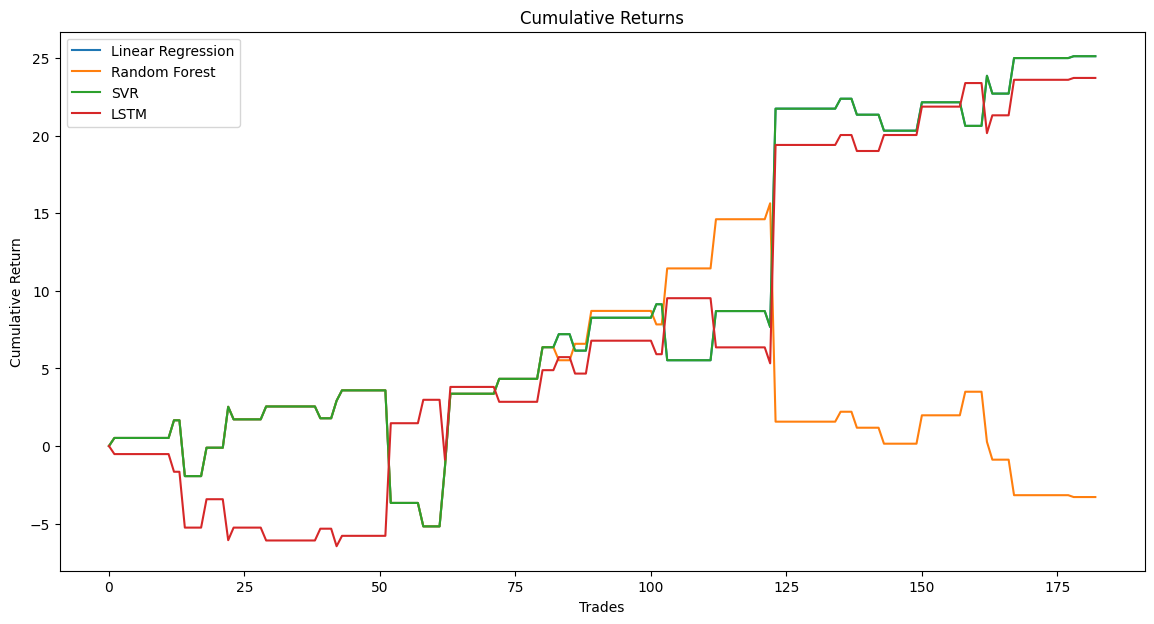

In [ ]:
# Plot Cumulative Returns
def plot_cumulative_returns(profits, model_name):
    cumulative_returns = np.cumsum(profits)
    plt.plot(cumulative_returns, label=model_name)

plt.figure(figsize=(14, 7))
plot_cumulative_returns(lr_profits, 'Linear Regression')
plot_cumulative_returns(rf_profits, 'Random Forest')
plot_cumulative_returns(svr_profits, 'SVR')
plot_cumulative_returns(lstm_profits, 'LSTM')
plt.title('Cumulative Returns')
plt.xlabel('Trades')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

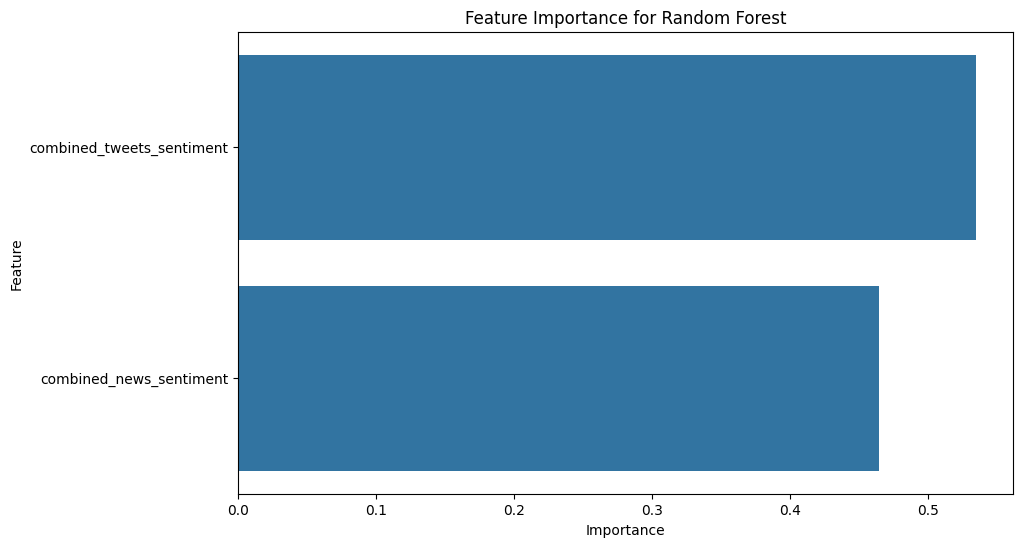

In [ ]:
feature_importances = rf_model.feature_importances_
features_names = features.columns
importance_df = pd.DataFrame({'Feature': features_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()